## Import Libraries

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import dtale as dt


In [34]:
df = pd.read_csv("final_data.csv")

In [32]:
dt.show(df)

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Macro: {f1_macro}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")

In [36]:

thresholds = {
    'high price': df['highest_value'].quantile(0.75),
    'good price': df['highest_value'].quantile(0.50),
    'cheap price': df['highest_value'].quantile(0.25)
}


def categorize_value(value):
    if value >= thresholds['high price']:
        return 'high price'
    elif value >= thresholds['good price']:
        return 'good price'
    else:
        return 'cheap price'

df['price_category'] = df['highest_value'].apply(categorize_value)


df['price_category_encoded'] = df['price_category'].map({
    'cheap price': 0,
    'good price': 1,
    'high price': 2
})





In [37]:
features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
            'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
            'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'position_encoded', 'winger']
X = df[features]
y = df['price_category_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [4, 5, 6, 7, 10, 15],
    'n_estimators': [35, 40, 50, 60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [38]:

grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Macro: {f1_macro}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 35}
Accuracy: 0.8489074848907485
F1 Macro: 0.8209530492308182
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1070
           1       0.72      0.66      0.69       505
           2       0.91      0.82      0.86       576

    accuracy                           0.85      2151
   macro avg       0.83      0.81      0.82      2151
weighted avg       0.85      0.85      0.85      2151

Confusion Matrix:


(3566, 11)

(3511, 11)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

(3511, 325)

In [26]:
df.head(2)

,Year,Engine_Size,Mileage,Negotiable,Price,Type_3,Type_300,Type_3008,Type_301,Type_5,...,Make_Zhengzhou,Gear_Type_Automatic,Gear_Type_Manual,Origin_Gulf Arabic,Origin_Other,Origin_Saudi,Origin_Unknown,Options_Full,Options_Semi Full,Options_Standard
1,2014,8.0,80000,False,120000,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,2015,5.0,140000,False,260000,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [27]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['Price'].quantile(0.35)
p75 = df['Price'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df['car_price_category'] = df['Price'].apply(categorize_price)

df.drop('Price', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['car_price_category'].value_counts())

car_price_category
Good_Price     1404
Cheap_Price    1227
High_Price      880
Name: count, dtype: int64


In [28]:
p35, p75

(46000.0, 95000.0)

In [29]:
#df['car_price_category'] 

In [30]:
encoder = LabelEncoder()
df['car_price_category_encoded'] = encoder.fit_transform(df['car_price_category'])  

#### 3. Feature selection

In [31]:
# sns.heatmap(df.corr(), annot=True);

In [32]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['car_price_category_encoded'].sort_values(ascending=False))

car_price_category_encoded    1.000000
Year                          0.407525
Engine_Size                   0.334464
Options_Full                  0.305622
Make_Mercedes                 0.225376
                                ...   
Make_Hyundai                 -0.223059
Type_Accent                  -0.237844
Options_Standard             -0.283697
Mileage                      -0.287567
Negotiable                         NaN
Name: car_price_category_encoded, Length: 325, dtype: float64


In [33]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['car_price_category_encoded']) > \
threshold]['car_price_category_encoded'].index
selected_features

Index(['Year', 'Engine_Size', 'Mileage', 'Type_Accent', 'Type_Land Cruiser',
       'Make_Hyundai', 'Make_Mercedes', 'Options_Full', 'Options_Standard',
       'car_price_category_encoded'],
      dtype='object')

In [34]:
selected_features = ['Year', 'Engine_Size', 'Mileage', 'Type_Accent', 'Type_Land Cruiser',
                      'Make_Hyundai', 'Make_Mercedes', 'Options_Full', 'Options_Standard',
                      'car_price_category_encoded']

In [35]:
df = df[selected_features]
df.head()

,Year,Engine_Size,Mileage,Type_Accent,Type_Land Cruiser,Make_Hyundai,Make_Mercedes,Options_Full,Options_Standard,car_price_category_encoded
1,2014,8.0,80000,False,False,False,False,True,False,2
2,2015,5.0,140000,False,False,False,False,True,False,2
3,2015,2.4,220000,False,False,False,False,False,False,0
5,2019,2.0,25000,False,False,False,False,False,False,1
6,2012,4.8,189000,False,False,False,False,True,False,1


#### 4. Prepare train and test data

In [36]:
# Prepare data
X = df.drop(['car_price_category_encoded'], axis=1)
y = df['car_price_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [37]:
X.shape

(3511, 9)

## Buliding the Model

In [50]:
#model = LogisticRegression()

dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [79]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 10, 15],   # Regularization strength
    'n_estimators':[35, 40, 50, 60]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [80]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
rf_classifier.fit(X_train, y_train)

NameError: name 'rf_classifier' is not defined

In [82]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 10, 15],
                         'n_estimators': [35, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [83]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 40}

In [84]:
best_model = grid_search.best_estimator_

## Test the Model

In [85]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model 

In [45]:
# our benchmark model
base_model = round(df['car_price_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

39.99

1. Accuracy

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.6998577524893315

In [47]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.7667140825035562

In [48]:
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.9960826210826211

In [49]:
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9960826210826211

In [86]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8065433854907539

In [87]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.8757122507122507

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[194,  46,   3],
       [ 36, 217,  27],
       [  2,  22, 156]])

In [104]:
print(classification_report(y_test,
                      y_pred_rf_g,
                      labels=list(best_model.classes_)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       243
           1       0.76      0.78      0.77       280
           2       0.84      0.87      0.85       180

    accuracy                           0.81       703
   macro avg       0.81      0.81      0.81       703
weighted avg       0.81      0.81      0.81       703



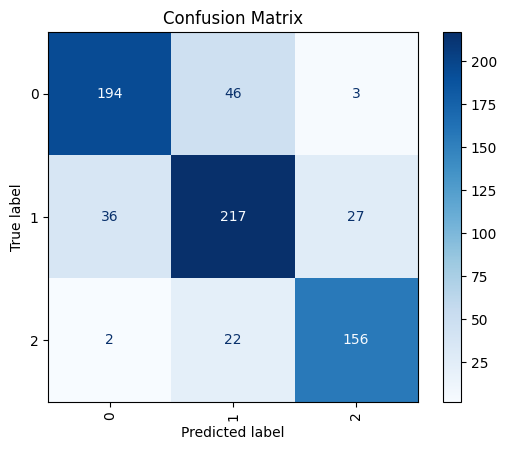

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [101]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.81


In [102]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.81


In [103]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.81


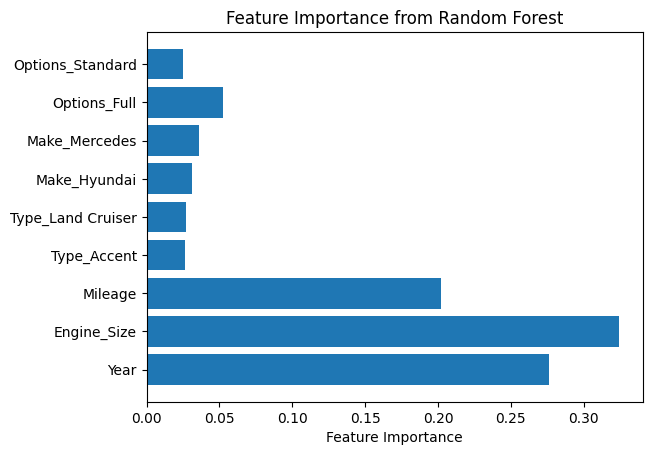

In [108]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()